# 1. Análisis de Series de Tiempo

## Setup

In [2]:
import sys, os
sys.path.append(os.getcwd().replace('/notebooks',''))  # Replace with current directory name

In [7]:
#===== Configuración regional =================================
import locale

# Name might vary with operating system.
locale.setlocale(locale.LC_ALL, 'es_ES')

locale._override_localeconv["thousands_sep"] = "."

#===== Librerías ==============================================
# Importing the Warnings library for better presentation
import warnings

# Importando la biblioteca pandas para manipulación y análisis de datos
import pandas as pd
# Importando NumPy para operaciones numéricas y manipulación de arreglos
import numpy as np
# Importando itertools para generar combinaciones de columnas
import itertools

# Importando matplotlib.pyplot para crear gráficos y visualizaciones
import matplotlib.pyplot as plt
# Importando Seaborn para visualización de datos estadísticos (opcional, pero puede complementar a Plotly)
import seaborn as sns
# Importando Plotly Express para visualizaciones interactivas de alto nivel y fáciles de usar
import plotly.express as px
# Importando Plotly Graph Objects para un control más detallado sobre las visualizaciones
import plotly.graph_objects as go
# Multiple graphs in a figure
from plotly.subplots import make_subplots

# Importando la función seasonal_decompose para la descomposición de series temporales
from statsmodels.tsa.seasonal import seasonal_decompose

#===== Ajustes visualización gráficos ============================
warnings.filterwarnings('ignore', category=DeprecationWarning)
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'
warnings.resetwarnings()

# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

#===== Librerías proyecto ============================
from utils.data import Datasets
from utils.eda import column_explore


## Carga inicial de datos

In [8]:
ds = Datasets()
cash_orig, fees_orig = ds.get_original_datasets()

## Series de Tiempo para cash_request

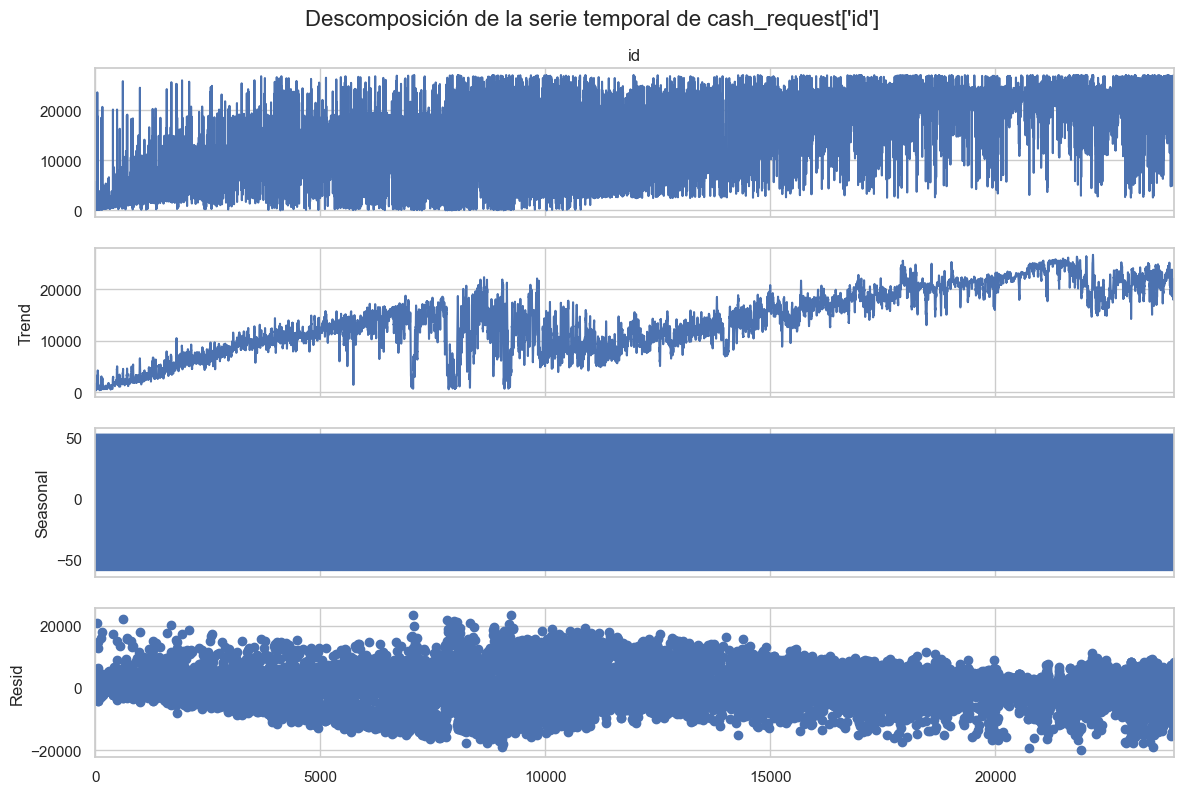

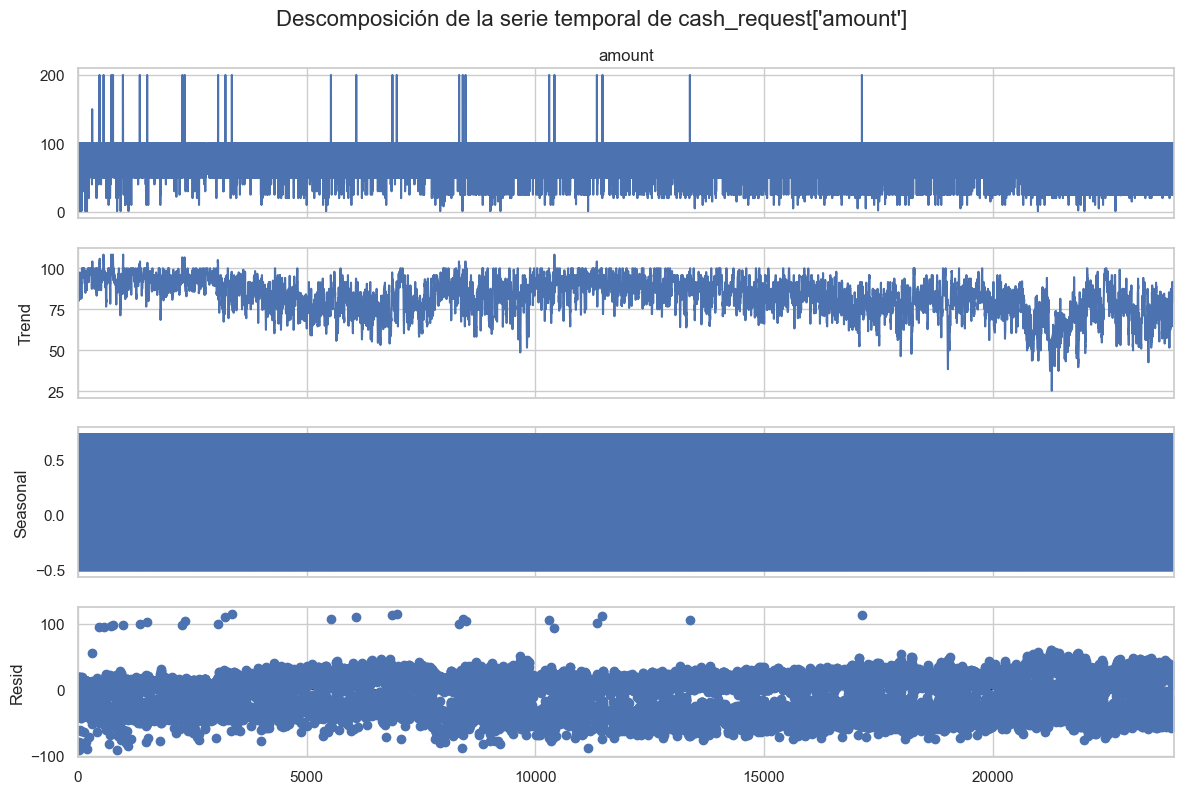

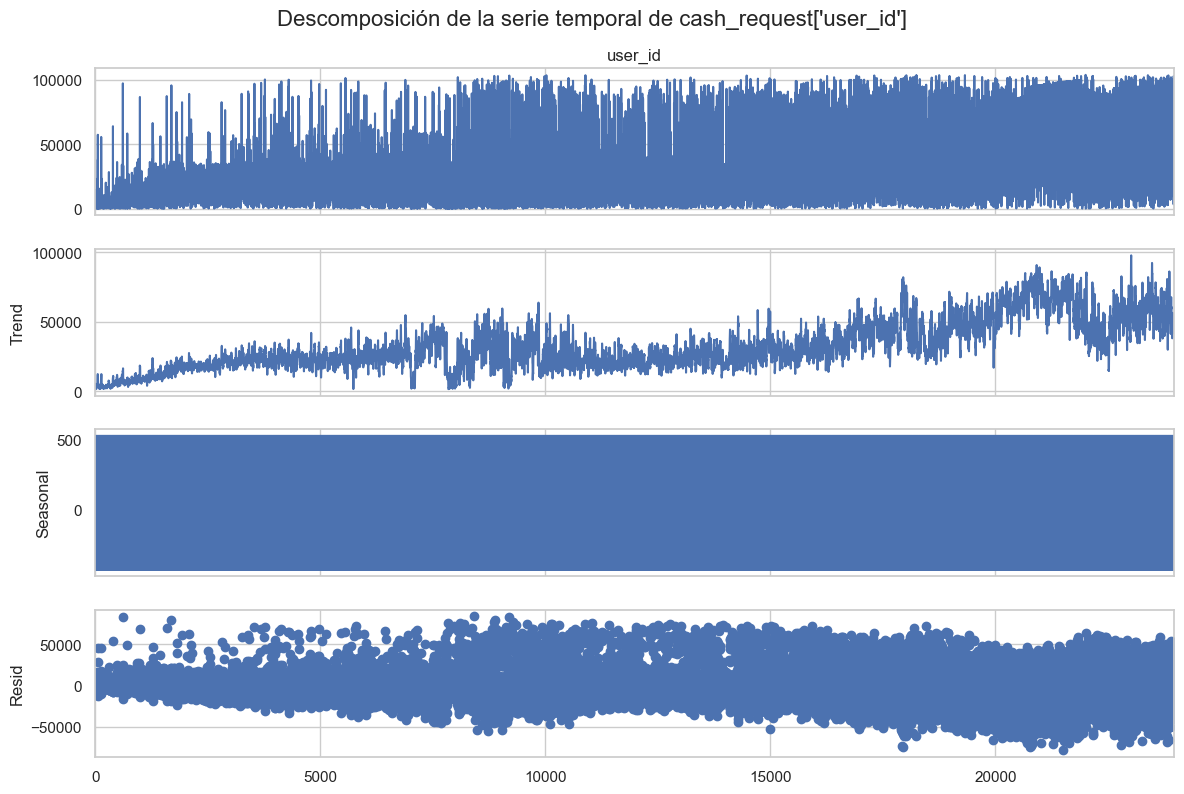

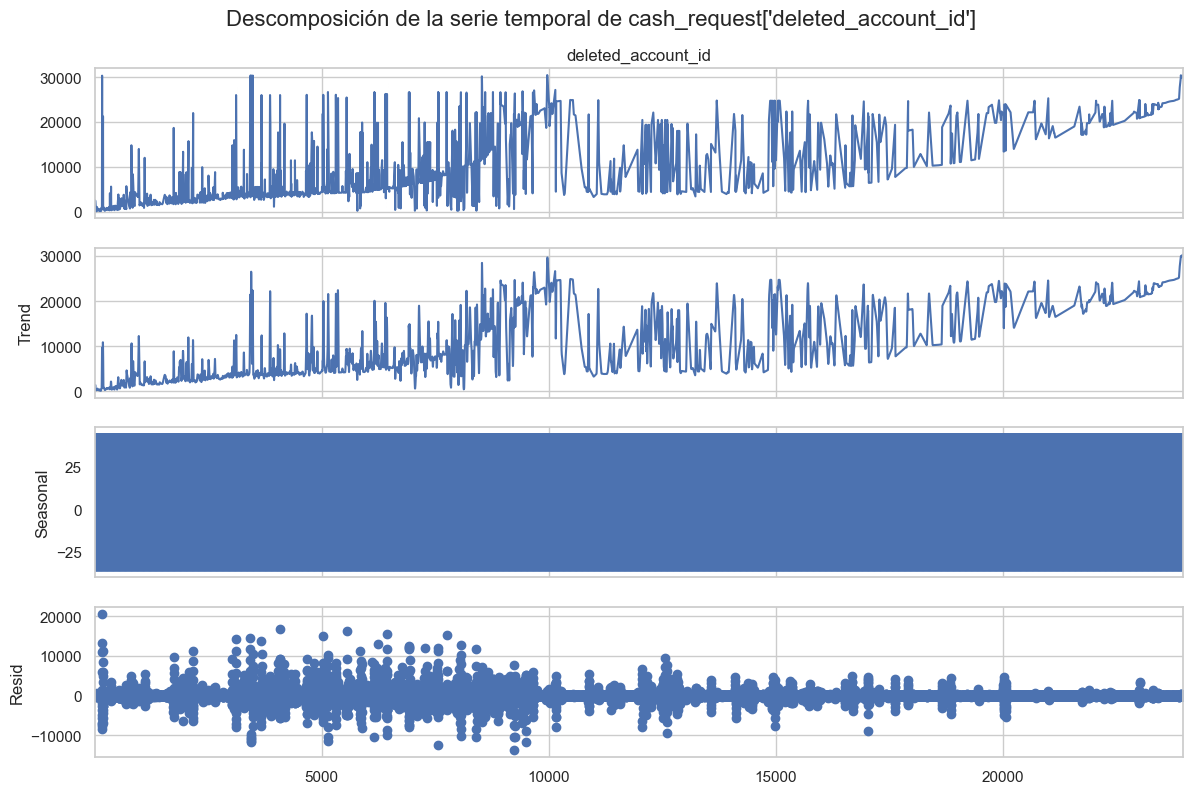

In [11]:
df = cash_orig
columnas_numericas = df.describe().columns.to_list()
# Descomposición de series temporales para cada columna numérica individual
for c in columnas_numericas:
    # Crear una copia del DataFrame para trabajar
    cash_request_copy = df[c].copy()
    # Verifica si hay valores faltantes y elimínalos o interpola
    if cash_request_copy.isnull().any():
        cash_request_copy = cash_request_copy.interpolate() # Rellenar NaN con interpolación
    # Eliminar filas con valores faltantes
    cash_request_copy = cash_request_copy.dropna()
    # Verificar que no hay valores no finitos
    if not np.isfinite(cash_request_copy).all():
        print(f'La columna {c} contiene valores no finitos, se omite la descomposición.')
        continue
    # Descomposición de la serie temporal
    descomposicion = seasonal_decompose(cash_request_copy, model='additive', period=12)
    # Graficar la descomposición
    fig = descomposicion.plot()
    # Ajustar el tamaño de la figura con matplotlib
    warnings.filterwarnings('ignore', category=DeprecationWarning)
    plt.gcf().set_size_inches(12, 8)
    warnings.resetwarnings()
    # Ajustar el título para que no se superponga
    fig.suptitle(f'Descomposición de la serie temporal de cash_request[\'{c}\']', fontsize=16, y=1.01)
    plt.show()

## Series de Tiempo para fees

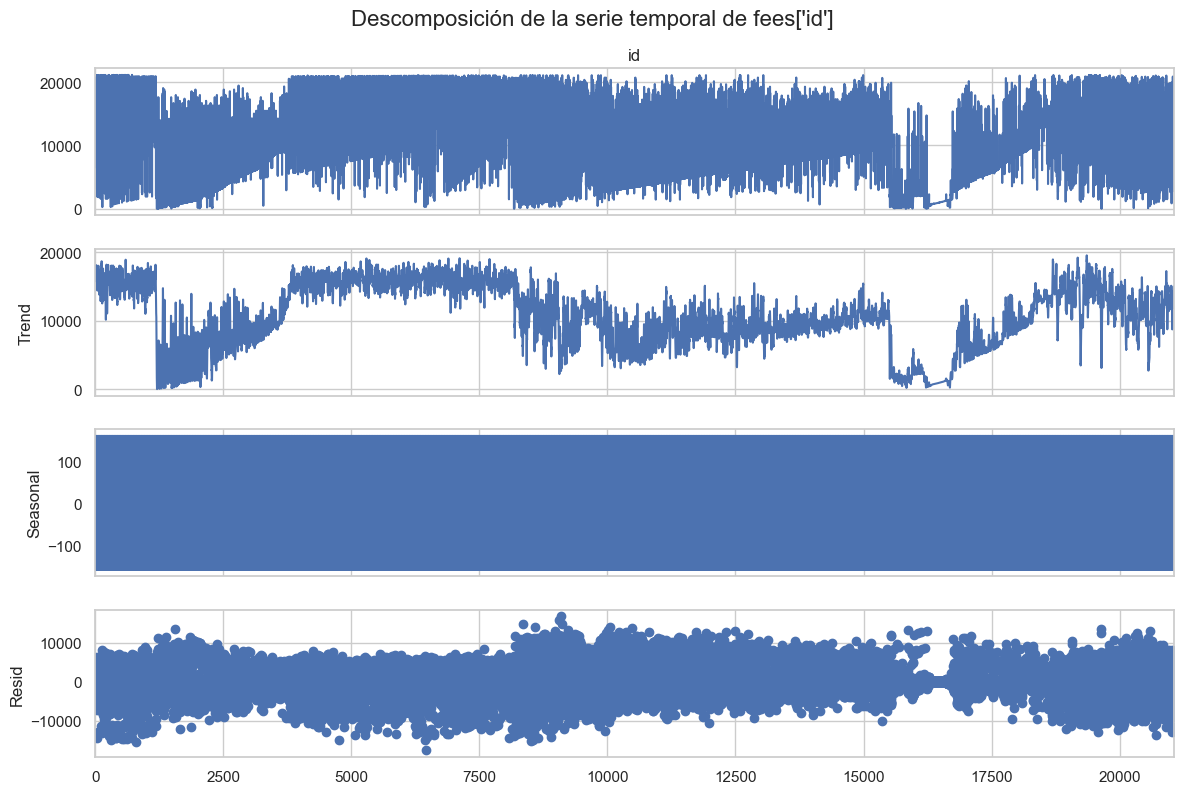

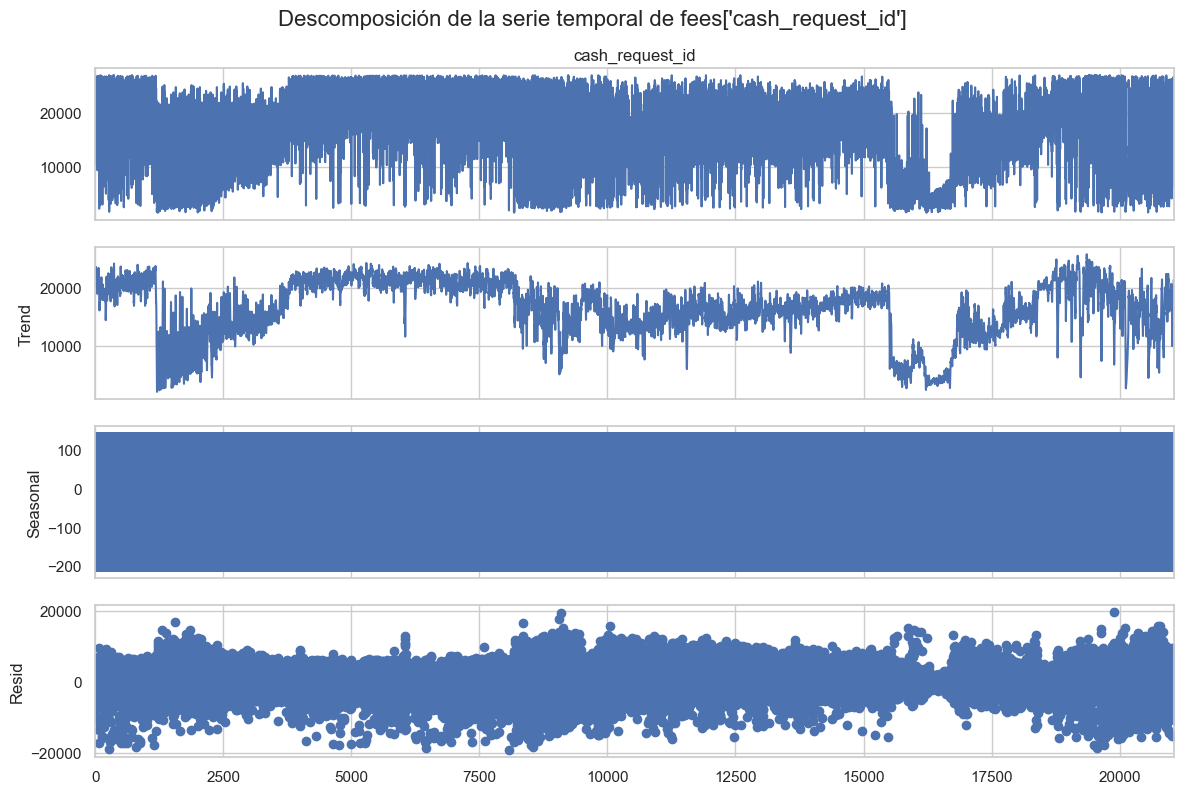

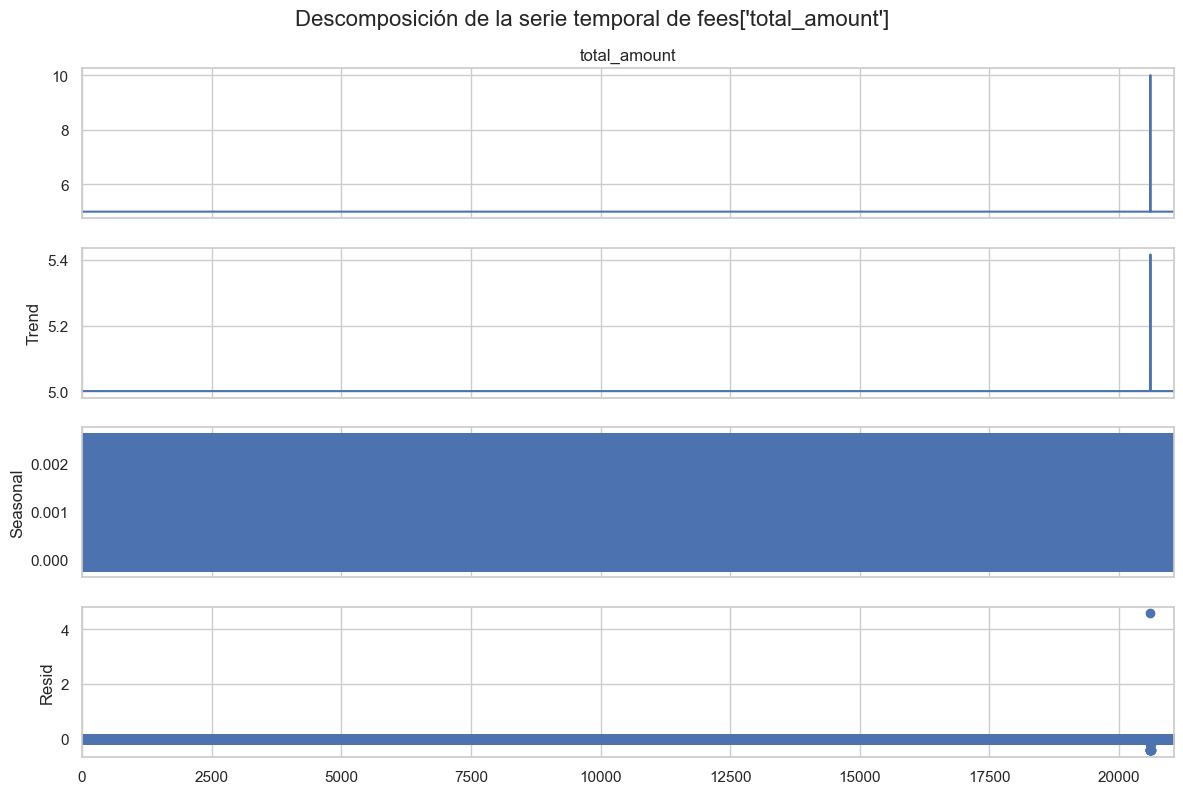

In [12]:
df = fees_orig
columnas_numericas = df.describe().columns.to_list()
# Descomposición de series temporales para cada columna numérica individual
for c in columnas_numericas:
    # Crear una copia del DataFrame para trabajar
    cash_request_copy = df[c].copy()
    # Verifica si hay valores faltantes y elimínalos o interpola
    if cash_request_copy.isnull().any():
        cash_request_copy = cash_request_copy.interpolate() # Rellenar NaN con interpolación
    # Eliminar filas con valores faltantes
    cash_request_copy = cash_request_copy.dropna()
    # Verificar que no hay valores no finitos
    if not np.isfinite(cash_request_copy).all():
        print(f'La columna {c} contiene valores no finitos, se omite la descomposición.')
        continue
    # Descomposición de la serie temporal
    descomposicion = seasonal_decompose(cash_request_copy, model='additive', period=12)
    # Graficar la descomposición
    fig = descomposicion.plot()
    # Ajustar el tamaño de la figura con matplotlib
    warnings.filterwarnings('ignore', category=DeprecationWarning)
    plt.gcf().set_size_inches(12, 8)
    warnings.resetwarnings()
    # Ajustar el título para que no se superponga
    fig.suptitle(f'Descomposición de la serie temporal de fees[\'{c}\']', fontsize=16, y=1.01)
    plt.show()